# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | severobaykalsk
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | umm kaddadah
Processing Record 5 of Set 1 | puerto narino
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | zyryanka
Processing Record 10 of Set 1 | chancay
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushtobe
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | lagunillas
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | cuajinicuilapa
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | half moon bay
Processing Record 24 of Set 

Processing Record 38 of Set 4 | bilma
Processing Record 39 of Set 4 | baruun-urt
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | sinnamary
Processing Record 42 of Set 4 | pemangkat
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | le moule
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | nguiu
City not found. Skipping...
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | saldanha
Processing Record 0 of Set 5 | kalat
Processing Record 1 of Set 5 | unai
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | suntar
Processing Record 4 of Set 5 | xuchang
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | te anau
Processing Record 7 of Set 5 | ozgon
City not found. Skipping...
Processing Record 8 of Set 5 | xichang
Processing Record 9 of Set 5 | san patricio
Processin

Processing Record 27 of Set 8 | christchurch
Processing Record 28 of Set 8 | pahrump
Processing Record 29 of Set 8 | humaita
Processing Record 30 of Set 8 | sterling
Processing Record 31 of Set 8 | esna
Processing Record 32 of Set 8 | vanavara
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | den helder
Processing Record 36 of Set 8 | aklavik
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | iqaluit
Processing Record 39 of Set 8 | aginskoye
Processing Record 40 of Set 8 | nizwa
Processing Record 41 of Set 8 | padang
Processing Record 42 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 43 of Set 8 | puerto colombia
Processing Record 44 of Set 8 | hambantota
Processing Record 45 of Set 8 | baturaja
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | diego de almagro
Processing Record 48 of Set 8 | torbay
Processing Record 49 of Set 8 | dourbali
Processing Recor

Processing Record 14 of Set 12 | svetlaya
Processing Record 15 of Set 12 | broome
Processing Record 16 of Set 12 | mount isa
Processing Record 17 of Set 12 | cotonou
Processing Record 18 of Set 12 | tonota
Processing Record 19 of Set 12 | zabid
Processing Record 20 of Set 12 | linguere
Processing Record 21 of Set 12 | porbandar
Processing Record 22 of Set 12 | barkly west
Processing Record 23 of Set 12 | puerto escondido
Processing Record 24 of Set 12 | arroyo
Processing Record 25 of Set 12 | kerki
City not found. Skipping...
Processing Record 26 of Set 12 | inhambane
Processing Record 27 of Set 12 | ovre ardal
Processing Record 28 of Set 12 | vidim
Processing Record 29 of Set 12 | dutse
Processing Record 30 of Set 12 | asayita
City not found. Skipping...
Processing Record 31 of Set 12 | ust-maya
Processing Record 32 of Set 12 | havre-saint-pierre
Processing Record 33 of Set 12 | abu kamal
Processing Record 34 of Set 12 | narsaq
Processing Record 35 of Set 12 | guajara-mirim
City not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]


In [28]:
city_data_pd.to_csv(output_data_file, index_label="City_ID")
city_data_pd.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [29]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,58.14,88,20,0.00,ZA,1627449534
1,severobaykalsk,55.6500,109.3167,67.87,54,74,0.98,RU,1627449534
2,ushuaia,-54.8000,-68.3000,38.86,93,75,11.50,AR,1627449534
3,umm kaddadah,13.6017,26.6876,77.36,72,100,5.73,SD,1627449535
4,puerto narino,-3.7703,-70.3831,73.35,94,34,2.33,CO,1627449535


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = city_data_pd.loc[city_data_pd['Humidity'] > 100].index
humidity_df

Int64Index([], dtype='int64')

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
humid_index_data = city_data_pd.drop(humidity_df, inplace=False)
humid_index_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,58.14,88,20,0.00,ZA,1627449534
1,severobaykalsk,55.6500,109.3167,67.87,54,74,0.98,RU,1627449534
2,ushuaia,-54.8000,-68.3000,38.86,93,75,11.50,AR,1627449534
3,umm kaddadah,13.6017,26.6876,77.36,72,100,5.73,SD,1627449535
4,puerto narino,-3.7703,-70.3831,73.35,94,34,2.33,CO,1627449535


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

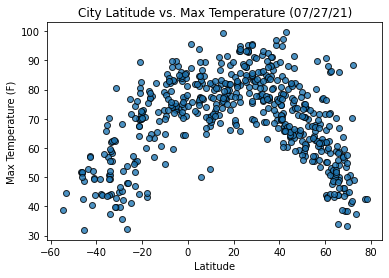

In [50]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)
plt.savefig("output_data/Fig1.png")
plt.show()

In [ ]:
plt.savefig("output_data/Fig1.png")

## Latitude vs. Humidity Plot

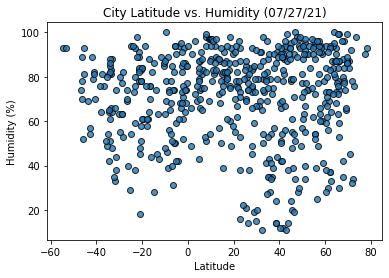

In [51]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(False)

plt.savefig("output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

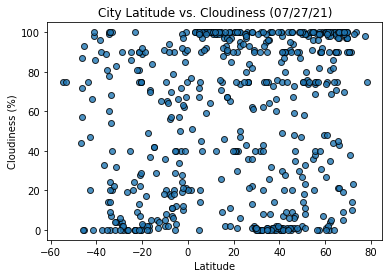

In [53]:

plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(False)

plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

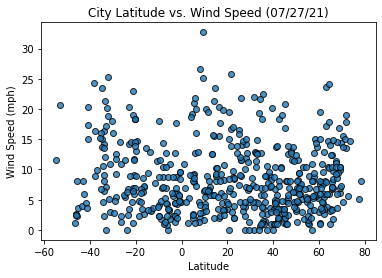

In [54]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(False)

plt.savefig("output_data/Fig4.png")

plt.show()

## Linear Regression

In [57]:
north_df = city_data_pd.loc[city_data_pd['Lat']>=0]
south_df = city_data_pd.loc[city_data_pd['Lat']<0]

In [58]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, r, p, stderr) = linregress(x_val, y_val)

    reg_val = x_val * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")

    plt.xlabel('Lat')
    plt.ylabel(title)
    print(f"The r-value is: {r**2}")

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.39984184596772654


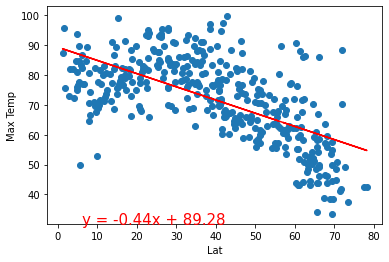

In [61]:
x_val = north_df['Lat']
y_val = north_df['Max Temp']

plot_linear_regression(x_val, y_val, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5595163172737205


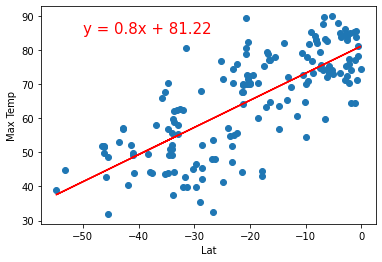

In [62]:
x_val = south_df['Lat']
y_val = south_df['Max Temp']

plot_linear_regression(x_val, y_val, 'Max Temp', (-50,85))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.001216125194802223


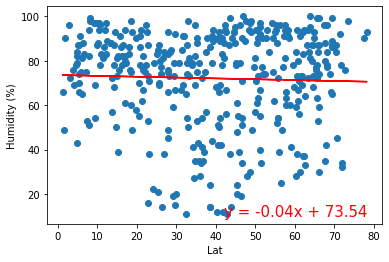

In [63]:
x_val = north_df['Lat']
y_val = north_df['Humidity']

plot_linear_regression(x_val, y_val, 'Humidity (%)', (42,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00010592190355346944


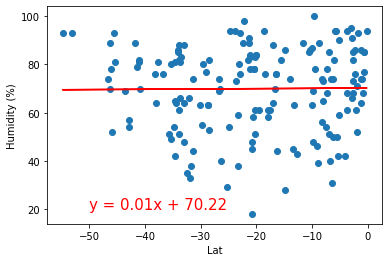

In [64]:
x_val = south_df['Lat']
y_val = south_df['Humidity']

plot_linear_regression(x_val, y_val, 'Humidity (%)', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003824216093468035


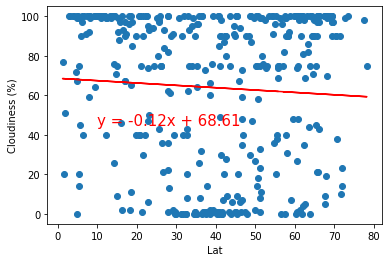

In [65]:
x_val = north_df['Lat']
y_val = north_df['Cloudiness']

plot_linear_regression(x_val, y_val, 'Cloudiness (%)', (10,45))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0013394410995314209


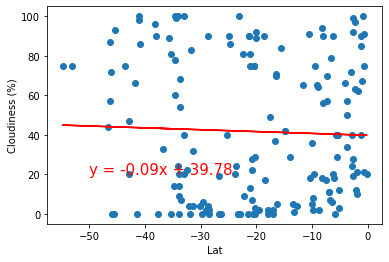

In [66]:
x_val = south_df['Lat']
y_val = south_df['Cloudiness']

plot_linear_regression(x_val, y_val, 'Cloudiness (%)', (-50,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0044290134898298476


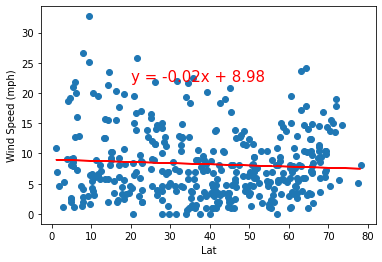

In [67]:
x_val = north_df['Lat']
y_val = north_df['Wind Speed']

plot_linear_regression(x_val, y_val, 'Wind Speed (mph)', (20,22))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08245433199608938


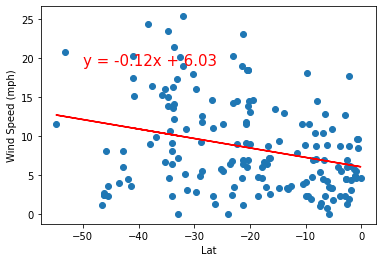

In [69]:
x_val = south_df['Lat']
y_val = south_df['Wind Speed']

plot_linear_regression(x_val, y_val, 'Wind Speed (mph)', (-50,19))

Three observable trends:
- Max Temp vs. Latitude is positively correlated 
- Wind Speed (mph) vs. Latitude is negatively correlated
- Cloudiness (%) vs. Latitude is negatively correlated